# Data Science and Business Analytics(GRIP June 2021)

## TASK - 2  Prediction using Unsupervised ML

## Task to do- From the given ‘Iris’ dataset, predict the optimum number of  clusters and represent it visually. 

#### Importing the Libraries

In [1]:
# importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy import stats
import sklearn.preprocessing as pp
from sklearn.metrics import silhouette_score

#### Reading the DATA

In [2]:
df=pd.read_csv(r"C:\Users\SINGH_HARVIN\Desktop\Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#Information of about columns of DATAFRAME
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


### To Check the Null values

In [4]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [5]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


#### Removal of extra Column

In [6]:
df.drop('Id',axis=1,inplace=True)

In [7]:
df.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


### Visualizing the Data

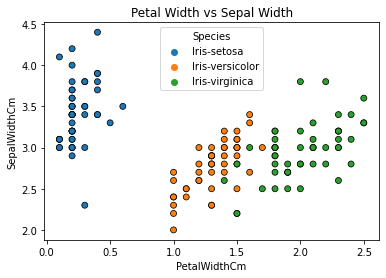

In [9]:
#PetalWidth vs SepalWidth
sns.scatterplot(x = 'PetalWidthCm', y = 'SepalWidthCm',edgecolor='k', data = df ,hue ='Species')
plt.title('Petal Width vs Sepal Width')
plt.show()

In [10]:
import matplotlib.colors as mcolors
cmap = mcolors.ListedColormap(["w", "grey", "green", "red"])

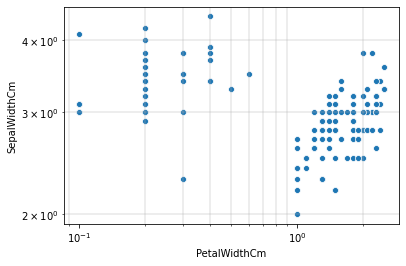

In [11]:
#map = sns.cubehelix_palette(rot=-0.4,as_cmap=True)
g =sns.scatterplot(x="PetalWidthCm",y="SepalWidthCm",
                   palette=cmap,data=df)
g.set(xscale="log", yscale="log")
g.xaxis.grid(True, "minor", linewidth=.45)
g.yaxis.grid(True, "minor", linewidth=.45)


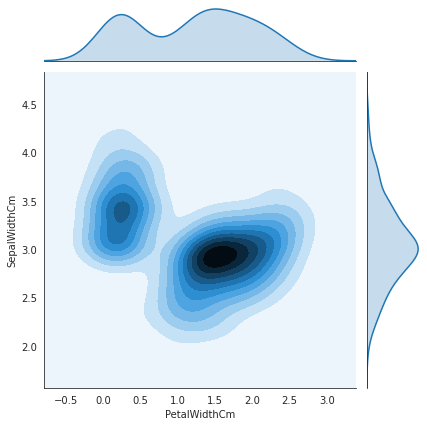

In [12]:
with sns.axes_style('white'):
    sns.jointplot("PetalWidthCm", "SepalWidthCm", df, kind='kde');

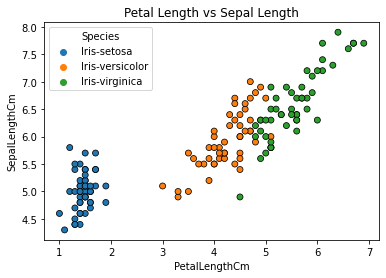

In [8]:
#PetalLength vs SepalLength
sns.scatterplot(x = 'PetalLengthCm', y = 'SepalLengthCm',edgecolor='k', data = df ,hue ='Species')
plt.title('Petal Length vs Sepal Length')
plt.show()

C:\Users\SINGH_HARVIN\anaconda3\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


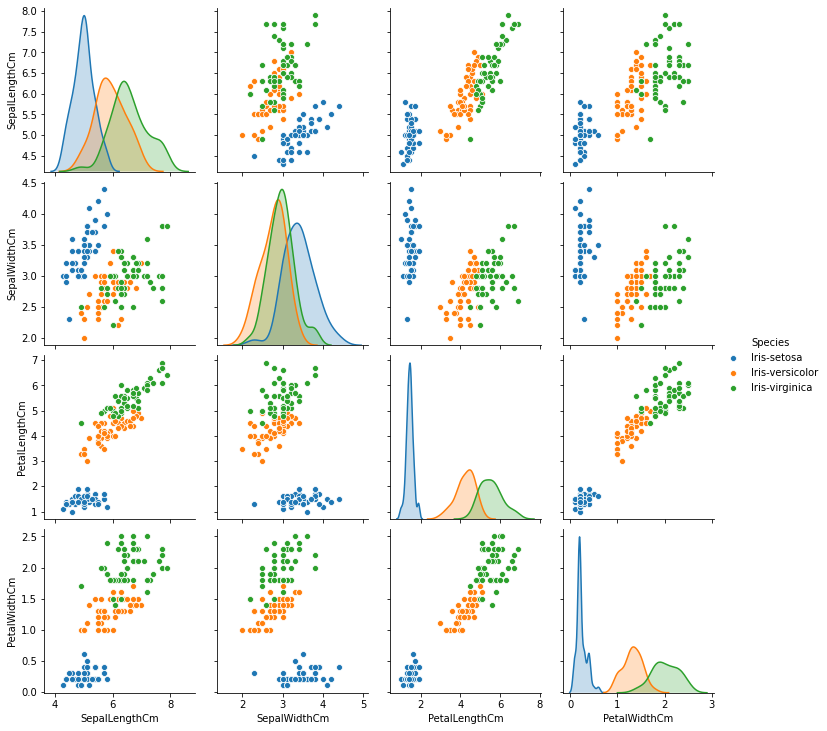

In [13]:
sns.pairplot(df, hue='Species', size=2.5);

#### optimum number of clusters using Elbow method¶

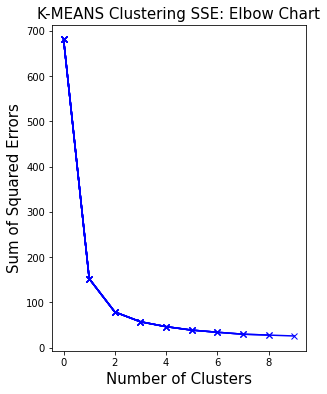

In [17]:
x = df.iloc[:, [0,1,2,3]].values
figure = plt.figure(figsize=(10, 6))
elbow = figure.add_subplot(1,2,1) #elbow chart


n_clusters=11
cost=[]

for i in range(1,n_clusters):
    kmean= KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmean.fit(x)
    cost.append(kmean.inertia_) 
    elbow.set_ylabel('Sum of Squared Errors', fontsize = 15)
    elbow.set_xlabel('Number of Clusters', fontsize = 15)
    elbow.set_title('K-MEANS Clustering SSE: Elbow Chart', fontsize = 15)
    elbow.plot(cost, 'bx-')

#### Optimum number of clusters using Silhouette score¶

Text(0, 0.5, 'Silhouette Score')

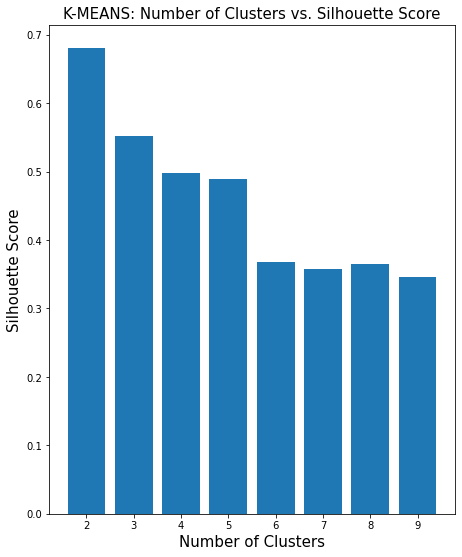

In [18]:
figure = plt.figure(figsize=(16, 9))
kmean_sil = figure.add_subplot(1,2,2) #silhouette bar chart
silhouette_scores = [] 

for n_cluster in range(2, 10):
    silhouette_scores.append( 
        silhouette_score(x, KMeans(n_clusters = n_cluster).fit_predict(x))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7,8,9] 
kmean_sil.bar(k, silhouette_scores) 
kmean_sil.set_title('K-MEANS: Number of Clusters vs. Silhouette Score', fontsize = 15)
kmean_sil.set_xlabel('Number of Clusters', fontsize = 15) 
kmean_sil.set_ylabel('Silhouette Score', fontsize = 15)

#### K-means model

In [25]:
# Build the KMeans model
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
kmeans.fit(x)
labels = kmeans.fit_predict(x)

In [21]:
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

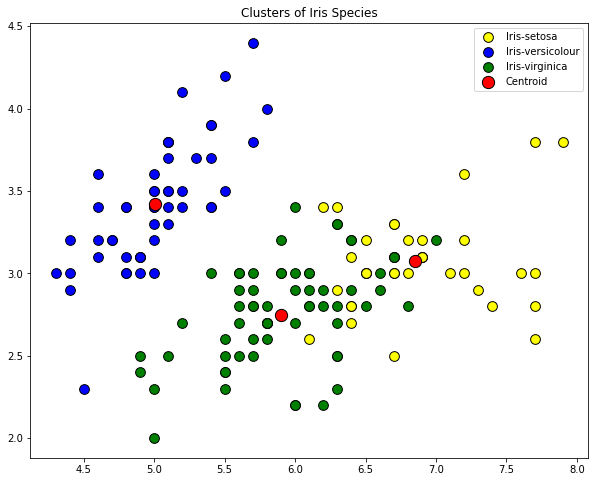

In [24]:

plt.figure(figsize=(10,8))
plt.scatter(x[labels == 0,0], x[labels == 0,1], s = 95, edgecolor='k', c = 'yellow', label = 'Iris-setosa')
plt.scatter(x[labels == 1,0], x[labels == 1,1], s = 95, edgecolor='k', c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[labels == 2,0], x[labels == 2,1], s = 95, edgecolor='k', c = 'green', label = 'Iris-virginica')

centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], s = 150, edgecolor='k', c ='red', label = 'Centroid')


plt.title('Clusters of Iris Species')
plt.legend()
plt.show()